In [2]:
#Imports
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [9]:
#Loads data for training, testing and system information
df = pd.read_csv('local_reduced.csv', sep=',', header=None)
synth_df = pd.read_csv('synth_data.csv', sep=',', header=None)
test = pd.read_csv('test_data.csv', sep=',', header=None)
system_df = pd.read_csv('kepinfo.csv', sep=',', header=0)
kepid = system_df["kepid"]
koiname = system_df["kepoi_name"]

In [10]:
df = df.sample(frac=1).reset_index(drop=True)
synth_df = synth_df.sample(frac=1).reset_index(drop=True)

#Splits and normalises all local data
x_train = df.drop([0, 1, 2], axis=1)
x_train_norm = []
for i, row in x_train.iterrows():
    row_norm = (row-min(row))/(max(row)-min(row))
    x_train_norm.append(row_norm)
x_train_norm = pd.DataFrame(x_train_norm)
type_train = df[2]
y_train = df[0]
label_train = df[1]
x_train_norm.columns = range(x_train_norm.shape[1])

#Splits and normalises all synthetic data
synth_x_train = synth_df.drop([0], axis=1)
synth_x_train_norm = []
for i, row in synth_x_train.iterrows():
    row_norm = (row-min(row))/(max(row)-min(row))
    synth_x_train_norm.append(row_norm)
synth_x_train_norm = pd.DataFrame(synth_x_train_norm)
synth_y_train = synth_df[0]
synth_x_train_norm.columns = range(synth_x_train_norm.shape[1])

#Merges synthetic data with local data
x_frames = [synth_x_train_norm, x_train_norm]
x_train_all = pd.concat(x_frames)
y_frames = [synth_y_train, y_train]
y_train_all = pd.concat(y_frames)

#Splits test data
x_test = test.drop([0], axis=1)
y_test = test[0]
label_test = test[1]

In [11]:
#Defines model
gnb = GaussianNB()
gnb.fit(x_train_norm, y_train)

y_pred = gnb.predict(x_test)

In [12]:
#Searches for LC based on ID
def lc_search(search_id):
    result = ""
    found = False
    for i in range(len(kepid)):
        if kepid[i] == search_id:
            found = True
            result = koiname[i]
    if found == False:
        print("target not found")
    return result


In [13]:
#Calculates euclidean distance
def euclidean_distance(target, pred):
    target = np.array(target)
    pred = np.array(pred)
    a = target
    b = pred
    dist= np.linalg.norm(a-b)
    return dist

https://exoplanetarchive.ipac.caltech.edu/overview/K05797.01
Euclidean Distance:  0.43029637271634225


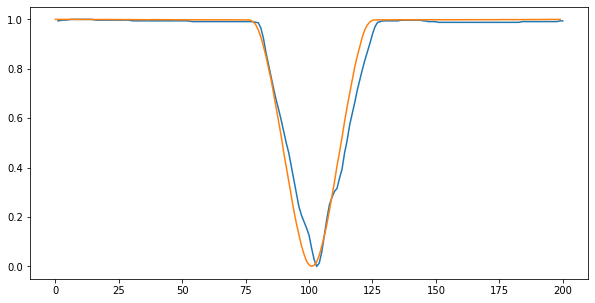

https://exoplanetarchive.ipac.caltech.edu/overview/K04616.01
Euclidean Distance:  2.267984800738234


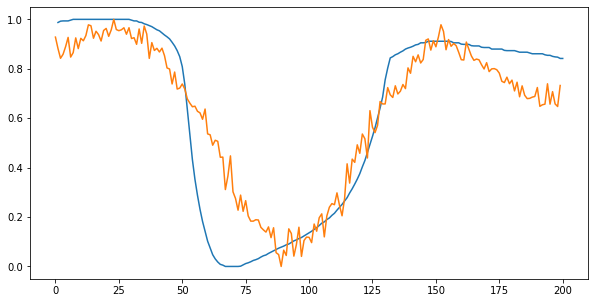

https://exoplanetarchive.ipac.caltech.edu/overview/K04049.01
Euclidean Distance:  2.9693081239614276


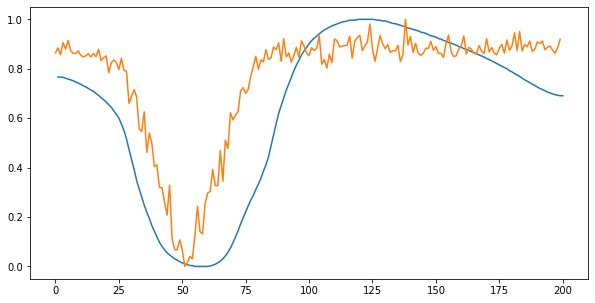

https://exoplanetarchive.ipac.caltech.edu/overview/K06394.01
Euclidean Distance:  4.117856590068482


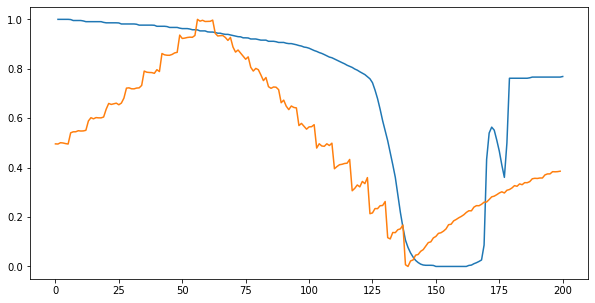

https://exoplanetarchive.ipac.caltech.edu/overview/K06485.01
Euclidean Distance:  3.1120240871463096


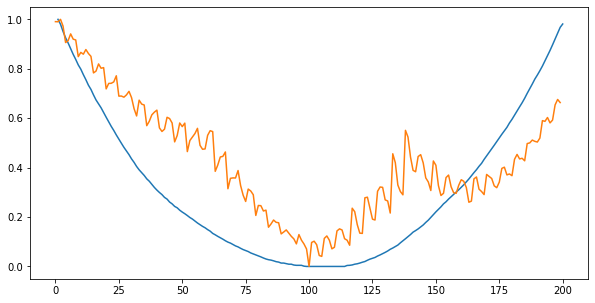

https://exoplanetarchive.ipac.caltech.edu/overview/K07298.01
Euclidean Distance:  2.4210949377922604


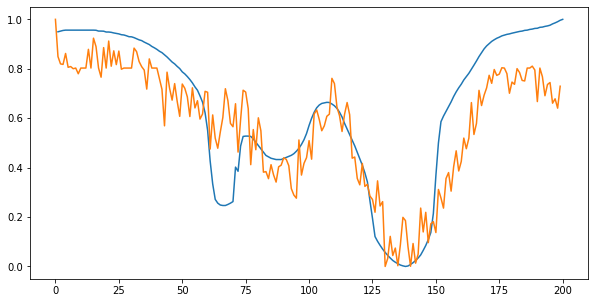

https://exoplanetarchive.ipac.caltech.edu/overview/K06485.01
Euclidean Distance:  3.7787157007540384


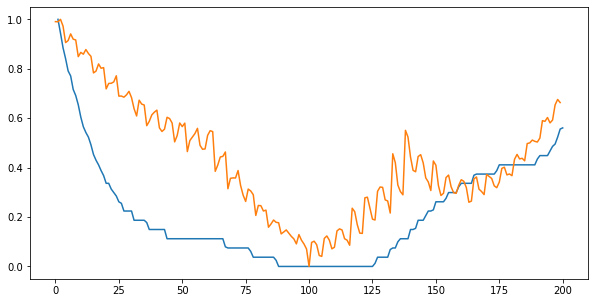

https://exoplanetarchive.ipac.caltech.edu/overview/K03785.01
Euclidean Distance:  2.7678512230435732


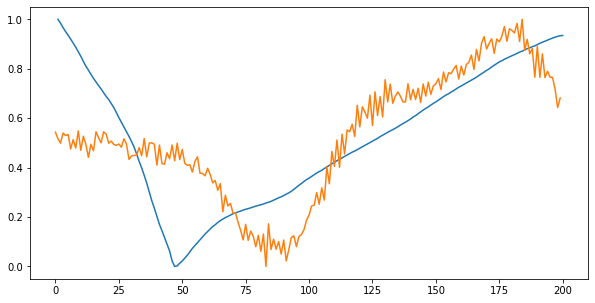

https://exoplanetarchive.ipac.caltech.edu/overview/K07247.01
Euclidean Distance:  3.112387715585577


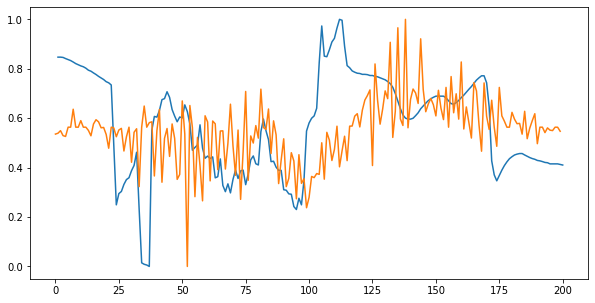

https://exoplanetarchive.ipac.caltech.edu/overview/K01896.01
Euclidean Distance:  2.0087705999751004


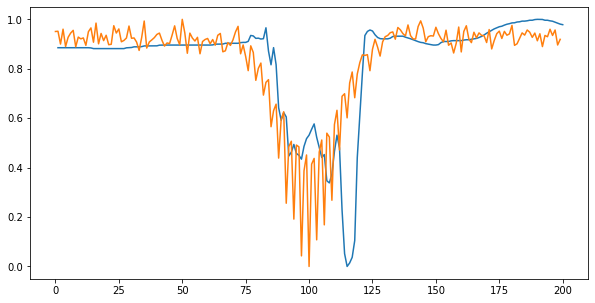

In [ ]:
#Returns LC and input
perf = []
for i in range(len(y_pred)):
    
    search_id = y_pred[i]
    
    for index, row in df.iterrows():
        if row[0] == search_id:
            similar_lc = x_train_norm.iloc[index]
    test_lc = x_test.iloc[i]
    
    #Creates link to overview page of kepler object
    link = "https://exoplanetarchive.ipac.caltech.edu/overview/" + lc_search(search_id)
    print(link)
    
    #Metric that roughly shows how similar the curves are
    ED = euclidean_distance(test_lc, similar_lc)
    perf.append(ED)
    print("Euclidean Distance: ", ED)
    
    #Plots curves
    plt.figure(figsize=(10,5))
    plt.plot(test_lc)
    plt.plot(similar_lc)
    plt.show()
    config = dict({'scrollZoom': True})

#Shows average euclidean distance as crude performance metric
print("Average Euclidean Distance: ",np.mean(perf))